In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from simplegrad import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from simplegrad.algo.nn import DenseLayer
from simplegrad.algo.optimize import Adam
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [13]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [14]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
Y = np.eye(10)[y]
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=y)
X_train.shape, X_test.shape, y_train.shape

((1347, 64), (450, 64), (1347, 10))

In [17]:
denseLayerOne = DenseLayer(num_neurons=64, activation='tanh')
denseLayerMiddle = DenseLayer(num_neurons=32, activation='tanh')
denseLayerOutput = DenseLayer(num_neurons=10, activation='softmax')


In [18]:
def makeModel(input):
    model = denseLayerOne(input)
    model = denseLayerMiddle(model)
    model = denseLayerOutput(model)
    return model


In [19]:
X_train_val = Value(X_train)
model = makeModel(X_train_val)
model.shape

(1347, 10)

In [20]:
loss = (-1 * (model + 1e-8).ln() * y_train).sum()

In [21]:
optimizer = Adam(
    model=loss,
    variables=denseLayerOne.getTrainable() +
              denseLayerMiddle.getTrainable() +
              denseLayerOutput.getTrainable(),
    lr=0.005
)

In [22]:
history = []
for _ in tqdm(range(500)):
    optimizer.step()
    history.append(loss.value[0, 0])

  0%|          | 0/500 [00:00<?, ?it/s]

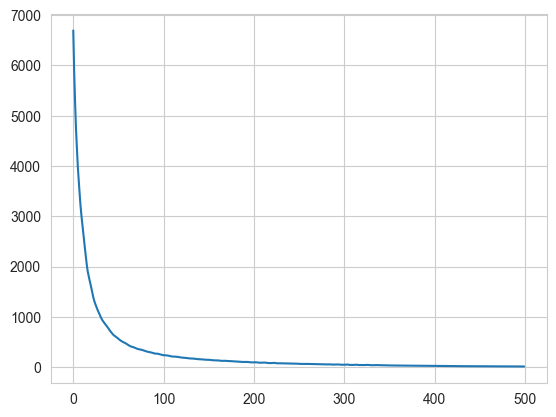

In [23]:
sns.lineplot(x=np.arange(len(history)), y=history)
None

In [24]:
valModel = makeModel(Value(X_test))
pred = np.argmax(valModel.forward(), axis=-1)
accuracy_score(np.argmax(y_test, axis=-1), pred)

0.9066666666666666

In [25]:
valModel = makeModel(Value(X_train))
pred = np.argmax(valModel.forward(), axis=-1)
accuracy_score(np.argmax(y_train, axis=-1), pred)


1.0